In [88]:
import pandas as pd
import numpy as np
%pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [89]:
df = pd.read_csv('HomeC.csv')
df

C:\Users\adhee\AppData\Local\Temp\ipykernel_20980\1728068120.py:1: DtypeWarning: Columns (0,27) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('HomeC.csv')


,time,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],...,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
0,1451624400,0.932833,0.003483,0.932833,0.000033,0.020700,0.061917,0.442633,0.124150,0.006983,...,10.00,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0000,24.40,0.00
1,1451624401,0.934333,0.003467,0.934333,0.000000,0.020717,0.063817,0.444067,0.124000,0.006983,...,10.00,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0000,24.40,0.00
2,1451624402,0.931817,0.003467,0.931817,0.000017,0.020700,0.062317,0.446067,0.123533,0.006983,...,10.00,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0000,24.40,0.00
3,1451624403,1.022050,0.003483,1.022050,0.000017,0.106900,0.068517,0.446583,0.123133,0.006983,...,10.00,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0000,24.40,0.00
4,1451624404,1.139400,0.003467,1.139400,0.000133,0.236933,0.063983,0.446533,0.122850,0.006850,...,10.00,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0000,24.40,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503906,1452128306,1.599333,0.003233,1.599333,0.000050,0.104017,0.625033,0.041750,0.005233,0.008433,...,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503907,1452128307,1.924267,0.003217,1.924267,0.000033,0.422383,0.637733,0.042033,0.004983,0.008467,...,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503908,1452128308,1.978200,0.003217,1.978200,0.000050,0.495667,0.620367,0.042100,0.005333,0.008233,...,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503909,1452128309,1.990950,0.003233,1.990950,0.000050,0.494700,0.634133,0.042100,0.004917,0.008133,...,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51


In [90]:
df.columns = [col.replace('[kW]', '').strip() for col in df.columns]
print("CLeaned Column Names: ", df.columns.tolist())
df.columns

CLeaned Column Names:  ['time', 'use', 'gen', 'House overall', 'Dishwasher', 'Furnace 1', 'Furnace 2', 'Home office', 'Fridge', 'Wine cellar', 'Garage door', 'Kitchen 12', 'Kitchen 14', 'Kitchen 38', 'Barn', 'Well', 'Microwave', 'Living room', 'Solar', 'temperature', 'icon', 'humidity', 'visibility', 'summary', 'apparentTemperature', 'pressure', 'windSpeed', 'cloudCover', 'windBearing', 'precipIntensity', 'dewPoint', 'precipProbability']


Index(['time', 'use', 'gen', 'House overall', 'Dishwasher', 'Furnace 1',
       'Furnace 2', 'Home office', 'Fridge', 'Wine cellar', 'Garage door',
       'Kitchen 12', 'Kitchen 14', 'Kitchen 38', 'Barn', 'Well', 'Microwave',
       'Living room', 'Solar', 'temperature', 'icon', 'humidity', 'visibility',
       'summary', 'apparentTemperature', 'pressure', 'windSpeed', 'cloudCover',
       'windBearing', 'precipIntensity', 'dewPoint', 'precipProbability'],
      dtype='object')

In [91]:
kitchen_cols = ['Dishwasher','Microwave','Fridge','Kitchen 12 [kW]','Kitchen 14 [kW]','Kitchen 38 [kW]']
available_cols = [c for c in kitchen_cols if c in df.columns]
df_kitchen = df[available_cols]
df_kitchen.sum()
df_kitchen
df_kitchen.notnull()

,Dishwasher,Microwave,Fridge
0,True,True,True
1,True,True,True
2,True,True,True
3,True,True,True
4,True,True,True
...,...,...,...
503906,True,True,True
503907,True,True,True
503908,True,True,True
503909,True,True,True


In [92]:
df['Total_Kitchen_Power'] = df[available_cols].sum(axis=1)

df['High_Useage'] = df['Total_Kitchen_Power'] <1.0
df[['Total_Kitchen_Power','High_Useage']].sample(50)

,Total_Kitchen_Power,High_Useage
375368,0.008400,True
32662,0.611317,True
336545,0.220017,True
347781,0.129900,True
372082,0.009067,True
67593,0.009450,True
291863,0.126817,True
152837,0.009183,True
493941,0.007917,True
194705,0.124317,True


In [93]:
df = df[df['time'] != '\\']
df['time'] = pd.to_numeric(df['time'], errors='coerce')
df = df.dropna(subset=['time'])
df['time'] = pd.to_datetime(df['time'], unit='s')
df['hour'] = df['time'].dt.hour
df[['time','hour']].head()

C:\Users\adhee\AppData\Local\Temp\ipykernel_20980\3031213934.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['time'] = pd.to_numeric(df['time'], errors='coerce')


,time,hour
0,2016-01-01 05:00:00,5
1,2016-01-01 05:00:01,5
2,2016-01-01 05:00:02,5
3,2016-01-01 05:00:03,5
4,2016-01-01 05:00:04,5


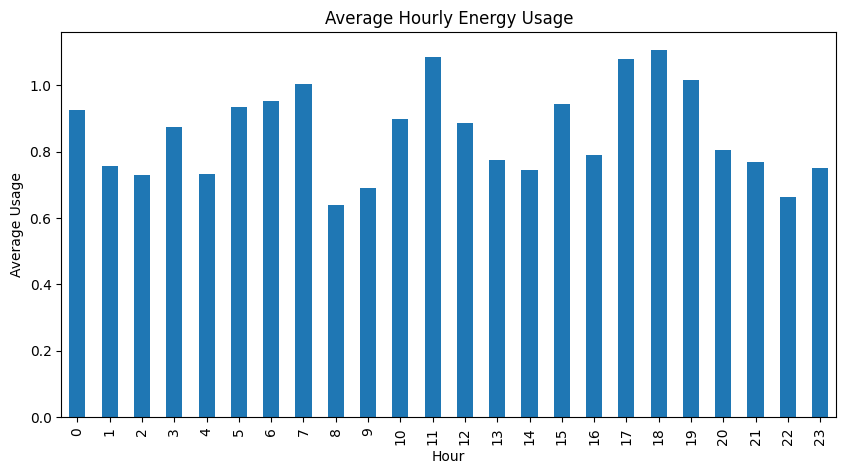

In [94]:
df['time'] = pd.to_datetime(df.index, unit='s', errors='coerce')
df.set_index('time', inplace=True)
df['hour'] = df.index.hour
hourly_status = df.groupby('hour')['use'].mean()
plt.figure(figsize=(10,5))
hourly_status.plot(kind='bar')
plt.title("Average Hourly Energy Usage")
plt.xlabel("Hour")
plt.ylabel("Average Usage")
plt.show()

In [95]:
df.index

DatetimeIndex(['1970-01-01 00:00:00', '1970-01-01 00:00:01',
               '1970-01-01 00:00:02', '1970-01-01 00:00:03',
               '1970-01-01 00:00:04', '1970-01-01 00:00:05',
               '1970-01-01 00:00:06', '1970-01-01 00:00:07',
               '1970-01-01 00:00:08', '1970-01-01 00:00:09',
               ...
               '1970-01-06 19:58:20', '1970-01-06 19:58:21',
               '1970-01-06 19:58:22', '1970-01-06 19:58:23',
               '1970-01-06 19:58:24', '1970-01-06 19:58:25',
               '1970-01-06 19:58:26', '1970-01-06 19:58:27',
               '1970-01-06 19:58:28', '1970-01-06 19:58:29'],
              dtype='datetime64[ns]', name='time', length=503910, freq=None)

In [96]:
df_clean = df.ffill()

In [97]:
df_clean.columns

Index(['use', 'gen', 'House overall', 'Dishwasher', 'Furnace 1', 'Furnace 2',
       'Home office', 'Fridge', 'Wine cellar', 'Garage door', 'Kitchen 12',
       'Kitchen 14', 'Kitchen 38', 'Barn', 'Well', 'Microwave', 'Living room',
       'Solar', 'temperature', 'icon', 'humidity', 'visibility', 'summary',
       'apparentTemperature', 'pressure', 'windSpeed', 'cloudCover',
       'windBearing', 'precipIntensity', 'dewPoint', 'precipProbability',
       'Total_Kitchen_Power', 'High_Useage', 'hour'],
      dtype='object')

In [98]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [99]:
df_clean['House overall']

time
1970-01-01 00:00:00    0.932833
1970-01-01 00:00:01    0.934333
1970-01-01 00:00:02    0.931817
1970-01-01 00:00:03    1.022050
1970-01-01 00:00:04    1.139400
                         ...   
1970-01-06 19:58:25    1.601233
1970-01-06 19:58:26    1.599333
1970-01-06 19:58:27    1.924267
1970-01-06 19:58:28    1.978200
1970-01-06 19:58:29    1.990950
Name: House overall, Length: 503910, dtype: float64

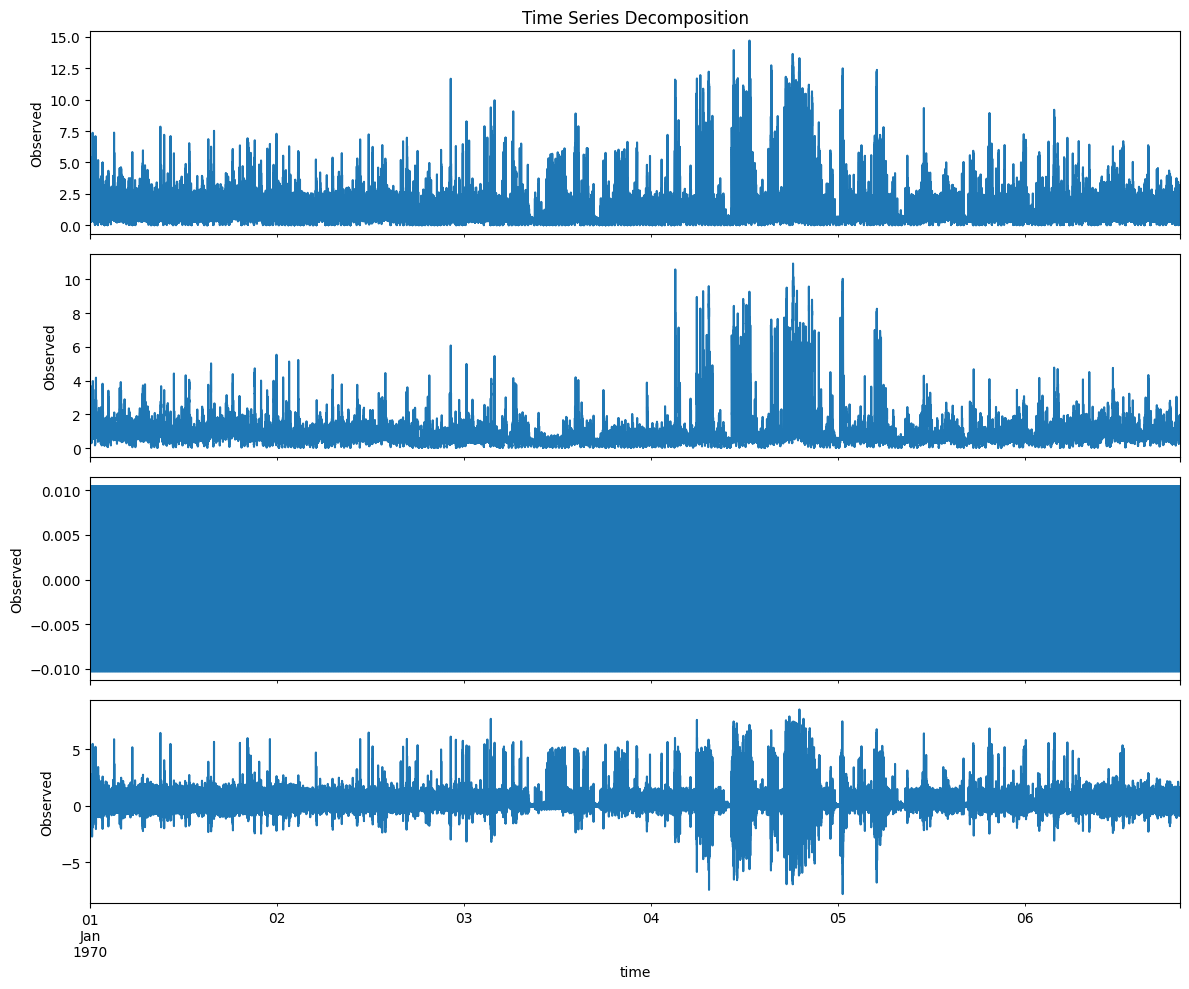

In [100]:
from statsmodels.tsa.seasonal import seasonal_decompose

target_col = df_clean['House overall']

# Y(t) = Trend(t) + Seasonality(t) + Residual(t)
decomposition = seasonal_decompose(df_clean['House overall'], model = 'additive', period = 24)

decomposition

fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(12,10),sharex=True)

decomposition.observed.plot(ax=ax1)
ax1.set_ylabel("Observed")
ax1.set_title("Time Series Decomposition")

decomposition.trend.plot(ax=ax2)
ax2.set_ylabel("Observed")
# ax1.set_title("Time Series Decomposition")

decomposition.seasonal.plot(ax=ax3)
ax3.set_ylabel("Observed")
# ax1.set_title("Time Series Decomposition")

decomposition.resid.plot(ax=ax4)
ax4.set_ylabel("Observed")
# ax1.set_title("Time Series Decomposition")

plt.tight_layout()
plt.show()